In [1]:
import warnings
import energypatterns.preprocess as preprocess
import energypatterns.clustering as clustering
warnings.filterwarnings("ignore")

C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df, ll87, boil_bbl = preprocess.loadData()

In [3]:
df = preprocess.featureEngineering(df, ll87, boil_bbl, 'Multifamily Housing')

In [4]:
norm_ts = preprocess.getTimeSeries(df)

In [6]:
dunnScore, silScore = clustering.computeSilhouetteDunnScores(norm_ts, 10)

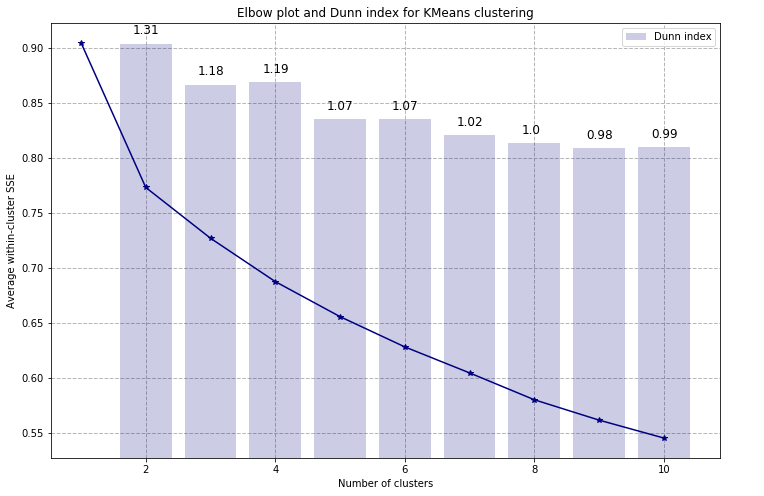

In [7]:
optClus = clustering.elbow(norm_ts, range(1,11))

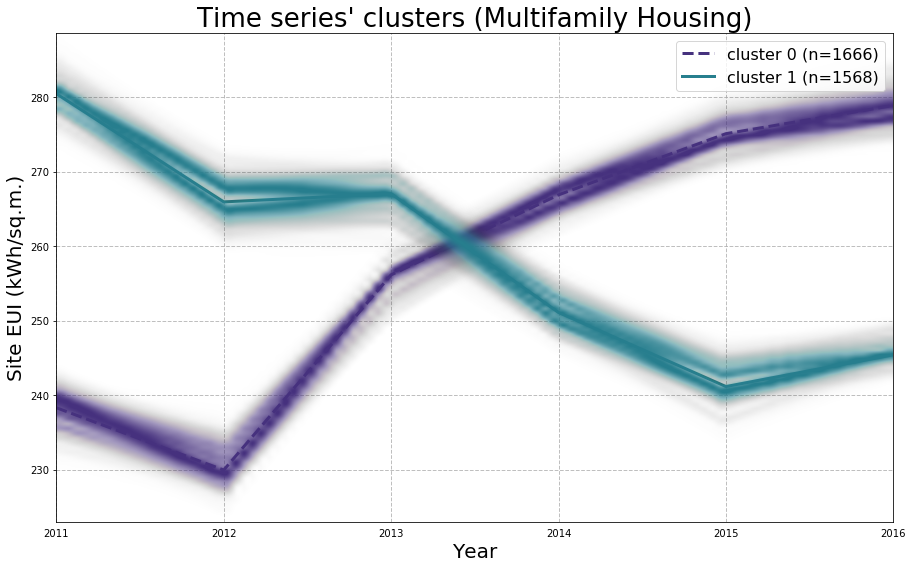

In [8]:
df = clustering.visualizeClusters(optClus, norm_ts, df, 'Multifamily Housing')

In [8]:
clustering.fisherTests(df, 'Multifamily Housing')

Fisher's test for feature -is_LL87- (p-value):  0.1468857863437555
Fisher's test for feature -has_boiler- (p-value):  0.025882063575232043
Fisher's test for feature -majorRealEstate- (p-value):  0.2274986713143086
Fisher's test for feature -NYC_CC- (p-value):  0.45214881345870783
Fisher's test for feature -in_Manhattan- (p-value):  0.5490999696880408
Fisher's test for feature -not_in_Manhattan- (p-value):  0.5490999696880408
Fisher's test for feature -top5organizations- (p-value):  0.3417114446550029
Fisher's test for feature -top5providers- (p-value):  0.008278939128049587


,Cluster 0 ratio,Cluster 1 ratio,Feature,Fisher p-value,Fisher statistic
0,0.160864,0.180485,is_LL87,0.146886,0.870451
1,0.415966,0.377551,has_boiler,0.025882,1.174217
2,0.423169,0.444515,majorRealEstate,0.227499,0.916750
3,0.049220,0.043367,NYC_CC,0.452149,1.141934
4,0.472989,0.462372,in_Manhattan,0.549100,1.043569
5,0.527011,0.537628,not_in_Manhattan,0.549100,0.958250
6,0.512005,0.529337,top5organizations,0.341711,0.932904
7,0.381152,0.336097,top5providers,0.008279,1.216621


In [9]:
clustering.mannwhitneyTests(df, 'Multifamily Housing')

Mann-Whitney test for feature -site11- (p-value): 7.488019399097009e-76
Mann-Whitney test for feature -site16- (p-value): 4.60840762030479e-45
Mann-Whitney test for feature -ess16- (p-value): 6.213914810565687e-22
Mann-Whitney test for feature -area- (p-value): 0.004837622464710835
Mann-Whitney test for feature -totLaund11- (p-value): 0.19452532998078492
Mann-Whitney test for feature -totLaund16- (p-value): 0.0028906050789340464
Mann-Whitney test for feature -units11- (p-value): 0.23130368130727375
Mann-Whitney test for feature -unitDens11- (p-value): 9.710836707542117e-06
Mann-Whitney test for feature -unitDens16- (p-value): 3.2178078666920664e-05
Mann-Whitney test for feature -NumFloors- (p-value): 0.04082189393091696
Mann-Whitney test for feature -YearBuilt- (p-value): 0.06771862350364169
Mann-Whitney test for feature -valuePerM2- (p-value): 0.09693949139411151


,Cluster 0 median,Cluster 1 median,Feature,Mann-Whitney p-value,Mann-Whitney statistic
0,238.329373,280.443167,site11,7.488019e-76,818046.0
1,278.865871,245.427203,site16,4.608408e-45,933632.0
2,54.000000,70.000000,ess16,6.213915e-22,1052606.5
3,9002.300700,8235.061274,area,4.837622e-03,1237485.5
4,0.087292,0.087869,totLaund11,1.945253e-01,1283320.5
5,0.090800,0.089470,totLaund16,2.890605e-03,1233026.5
6,81.000000,80.000000,units11,2.313037e-01,1286651.0
7,9.330459,9.703986,unitDens11,9.710837e-06,1192791.0
8,9.603803,9.981001,unitDens16,3.217808e-05,1200094.0
9,7.000000,6.000000,NumFloors,4.082189e-02,1261674.0
